# Análisis Exploratorio de Datos (EDA) - Programas de Universidades

   <img src="https://mentor.pe/wp-content/uploads/2023/12/portada-universidades.jpg" alt="" width="800px">

<h1>Introducción (EDA), fecha de corte 2024-06-04</h1>
    <p>El presente análisis exploratorio de datos (EDA) se centra en un conjunto de datos que contiene información detallada sobre el licenciamiento de diversas entidades educativas. Este análisis busca proporcionar una visión general de los datos, identificar patrones y tendencias, y establecer una base sólida para análisis posteriores.</p>
    <h2>Descripción del Conjunto de Datos</h2>
    <p>El conjunto de datos incluye las siguientes columnas, cada una de las cuales aporta información relevante sobre las entidades y sus procesos de licenciamiento:</p>
    <ul>
        <li><strong>CODIGO_ENTIDAD</strong>: Código único que identifica a cada entidad educativa.</li>
        <li><strong>NOMBRE</strong>: Nombre de la entidad educativa.</li>
        <li><strong>TIPO_GESTION</strong>: Tipo de gestión (pública o privada) de la entidad.</li>
        <li><strong>ESTADO_LICENCIAMIENTO</strong>: Estado actual del licenciamiento (e.g., activo, vencido).</li>
        <li><strong>FECHA_INICIO_LICENCIAMIENTO</strong>: Fecha en que comenzó el licenciamiento.</li>
        <li><strong>FECHA_FIN_LICENCIAMIENTO</strong>: Fecha en que finalizó o finalizará el licenciamiento.</li>
        <li><strong>PERIODO_LICENCIAMIENTO</strong>: Período total del licenciamiento en años.</li>
        <li><strong>CODIGO_FILIAL</strong>: Código único de la filial asociada.</li>
        <li><strong>NOMBRE_FILIAL</strong>: Nombre de la filial asociada.</li>
        <li><strong>DEPARTAMENTO_FILIAL</strong>: Departamento en el que se encuentra la filial.</li>
        <li><strong>PROVINCIA_FILIAL</strong>: Provincia en la que se encuentra la filial.</li>
        <li><strong>CODIGO_LOCAL</strong>: Código único del local educativo.</li>
        <li><strong>DEPARTAMENTO_LOCAL</strong>: Departamento en el que se encuentra el local educativo.</li>
        <li><strong>PROVINCIA_LOCAL</strong>: Provincia en la que se encuentra el local educativo.</li>
        <li><strong>DISTRITO_LOCAL</strong>: Distrito en el que se encuentra el local educativo.</li>
        <li><strong>LATITUD_UBICACION</strong>: Latitud de la ubicación del local.</li>
        <li><strong>LONGITUD_UBICACION</strong>: Longitud de la ubicación del local.</li>
        <li><strong>TIPO_AUTORIZACION_LOCAL</strong>: Tipo de autorización del local educativo.</li>
        <li><strong>DENOMINACION_PROGRAMA</strong>: Denominación del programa educativo ofrecido.</li>
        <li><strong>TIPO_NIVEL_ACADEMICO</strong>: Tipo de nivel académico del programa (e.g., pregrado, posgrado).</li>
        <li><strong>NIVEL_ACADEMICO</strong>: Nivel académico específico del programa.</li>
        <li><strong>CODIGO_CLASE_PROGRAMA_N2</strong>: Código de clase del programa en un segundo nivel de categorización.</li>
        <li><strong>NOMBRE_CLASE_PROGRAMA_N2</strong>: Nombre de la clase del programa en un segundo nivel de categorización.</li>
        <li><strong>TIPO_AUTORIZACION_PROGRAMA</strong>: Tipo de autorización del programa educativo.</li>
        <li><strong>TIPO_AUTORIZACION_PROGRAMA_LOCAL</strong>: Tipo de autorización del programa en el local específico.</li>
        <li><strong>FECHA_CORTE</strong>: Fecha de corte para la información presentada.</li>
        <li><strong>DURACION_LICENCIAMIENTO</strong>: Duración del licenciamiento en años, calculada como la diferencia entre la fecha de inicio y la fecha de fin del licenciamiento.</li>
    </ul>
    <h2>Objetivos del Análisis</h2>
    <ol>
        <li><strong>Caracterización de las Entidades</strong>: Analizar la distribución de las entidades educativas por tipo de gestión, estado de licenciamiento, y ubicación geográfica.</li>
        <li><strong>Duración del Licenciamiento</strong>: Examinar la duración del licenciamiento de las entidades y determinar si existen diferencias significativas en función del tipo de gestión o la ubicación.</li>
        <li><strong>Análisis Geoespacial</strong>: Utilizar las coordenadas geográficas (latitud y longitud) para mapear la distribución de las entidades y filiales a nivel nacional.</li>
        <li><strong>Autorización de Programas</strong>: Evaluar los tipos de autorizaciones de los programas educativos y su relación con el estado de licenciamiento de las entidades.</li>
    </ol>
    <h2>Metodología</h2>
    <p>El análisis se llevará a cabo utilizando técnicas estadísticas y de visualización de datos. Se emplearán herramientas de análisis de datos como pandas para la manipulación y limpieza de datos, y bibliotecas como matplotlib y seaborn para la visualización. Además, se considerarán técnicas de análisis geoespacial para mapear la distribución de las entidades.</p>
    <p>En resumen, este EDA proporcionará una comprensión inicial y detallada de los datos disponibles de los programas educativos.</p>


### Fuente de datos:
<img src="fuente_datos.png" alt="" width="800px">

Importando paquetes y librerias

In [314]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
from folium.plugins import HeatMap

In [315]:
# Crear un dataframe desde el archivo de datos CSV

df=pd.read_csv("Programas de Universidades_5.csv",delimiter='|',encoding="latin1")
df.head(5)

,CODIGO_ENTIDAD,NOMBRE,TIPO_GESTION,ESTADO_LICENCIAMIENTO,FECHA_INICIO_LICENCIAMIENTO,FECHA_FIN_LICENCIAMIENTO,PERIODO_LICENCIAMIENTO,CODIGO_FILIAL,NOMBRE_FILIAL,DEPARTAMENTO_FILIAL,...,LONGITUD_UBICACION,TIPO_AUTORIZACION_LOCAL,DENOMINACION_PROGRAMA,TIPO_NIVEL_ACADEMICO,NIVEL_ACADEMICO,CODIGO_CLASE_PROGRAMA_N2,NOMBRE_CLASE_PROGRAMA_N2,TIPO_AUTORIZACION_PROGRAMA,TIPO_AUTORIZACION_PROGRAMA_LOCAL,FECHA_CORTE
0,1,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,PÚBLICO,LICENCIA OTORGADA,20180410,20280410,10,S,UNMSM-LIMA,LIMA,...,-77.084423,AUTORIZADO POR LIC.,LINGÜÍSTICA,POSGRADO,DOCTORADO,23,IDIOMAS,RECONOCIDO POR LIC.,RECONOCIDO POR LIC.,20240604
1,1,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,PÚBLICO,LICENCIA OTORGADA,20180410,20280410,10,S,UNMSM-LIMA,LIMA,...,-77.084423,AUTORIZADO POR LIC.,ESCRITURA CREATIVA,POSGRADO,MAESTRÍA,23,IDIOMAS,RECONOCIDO POR LIC.,RECONOCIDO POR LIC.,20240604
2,1,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,PÚBLICO,LICENCIA OTORGADA,20180410,20280410,10,S,UNMSM-LIMA,LIMA,...,-77.084423,AUTORIZADO POR LIC.,LENGUA Y LITERATURA,POSGRADO,MAESTRÍA,23,IDIOMAS,RECONOCIDO POR LIC.,RECONOCIDO POR LIC.,20240604
3,1,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,PÚBLICO,LICENCIA OTORGADA,20180410,20280410,10,S,UNMSM-LIMA,LIMA,...,-77.084423,AUTORIZADO POR LIC.,LINGÜÍSTICA HISPÁNICA,POSGRADO,SEGUNDA ESPECIALIDAD,23,IDIOMAS,RECONOCIDO POR LIC.,RECONOCIDO POR LIC.,20240604
4,1,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,PÚBLICO,LICENCIA OTORGADA,20180410,20280410,10,S,UNMSM-LIMA,LIMA,...,-77.084423,AUTORIZADO POR LIC.,LITERATURA PERUANA Y LATINOAMERICANA,POSGRADO,DOCTORADO,23,IDIOMAS,RECONOCIDO POR LIC.,RECONOCIDO POR LIC.,20240604


https://www.datosabiertos.gob.pe/dataset/sunedu-programas-acad%C3%A9micos/resource/8e0ce930-9c8b-445a-96d8-a237839ad7e4#{}

In [316]:
# Convertimos la columna a un formato de fecha manipulable
# posteriormente para hallar la duracion se efectua la diferencia de las fechas

df['FECHA_INICIO_LICENCIAMIENTO'] = pd.to_datetime(df['FECHA_INICIO_LICENCIAMIENTO'], format='%Y%m%d')
df['FECHA_FIN_LICENCIAMIENTO'] = pd.to_datetime(df['FECHA_FIN_LICENCIAMIENTO'], format='%Y%m%d')
df['DURACION_LICENCIAMIENTO'] = (df['FECHA_FIN_LICENCIAMIENTO'] - df['FECHA_INICIO_LICENCIAMIENTO']).dt.days / 365.25

In [317]:
# Visualizacion del contenido y tipo de datos de cada columna del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8110 entries, 0 to 8109
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CODIGO_ENTIDAD                    8110 non-null   int64         
 1   NOMBRE                            8110 non-null   object        
 2   TIPO_GESTION                      8110 non-null   object        
 3   ESTADO_LICENCIAMIENTO             8110 non-null   object        
 4   FECHA_INICIO_LICENCIAMIENTO       8110 non-null   datetime64[ns]
 5   FECHA_FIN_LICENCIAMIENTO          8110 non-null   datetime64[ns]
 6   PERIODO_LICENCIAMIENTO            8110 non-null   int64         
 7   CODIGO_FILIAL                     8110 non-null   object        
 8   NOMBRE_FILIAL                     8110 non-null   object        
 9   DEPARTAMENTO_FILIAL               8110 non-null   object        
 10  PROVINCIA_FILIAL                  8110 non-null 

In [318]:
# number of rows and columns of the dataframe
# numero de filas y columnas del dataframe

rows,columns=df.shape
print(f"El dataframe tiene {rows} filas y {columns} columnas")

El dataframe tiene 8110 filas y 27 columnas


In [319]:
#checking null values
#suma de valores nulos por columnas en el dataframe

df.isnull().sum()

CODIGO_ENTIDAD                      0
NOMBRE                              0
TIPO_GESTION                        0
ESTADO_LICENCIAMIENTO               0
FECHA_INICIO_LICENCIAMIENTO         0
FECHA_FIN_LICENCIAMIENTO            0
PERIODO_LICENCIAMIENTO              0
CODIGO_FILIAL                       0
NOMBRE_FILIAL                       0
DEPARTAMENTO_FILIAL                 0
PROVINCIA_FILIAL                    0
CODIGO_LOCAL                        0
DEPARTAMENTO_LOCAL                  0
PROVINCIA_LOCAL                     0
DISTRITO_LOCAL                      0
LATITUD_UBICACION                   0
LONGITUD_UBICACION                  0
TIPO_AUTORIZACION_LOCAL             0
DENOMINACION_PROGRAMA               0
TIPO_NIVEL_ACADEMICO                0
NIVEL_ACADEMICO                     0
CODIGO_CLASE_PROGRAMA_N2            0
NOMBRE_CLASE_PROGRAMA_N2            0
TIPO_AUTORIZACION_PROGRAMA          0
TIPO_AUTORIZACION_PROGRAMA_LOCAL    0
FECHA_CORTE                         0
DURACION_LIC

In [320]:
#checking heads
#encabezados del dataframe

print(df.columns)

Index(['CODIGO_ENTIDAD', 'NOMBRE', 'TIPO_GESTION', 'ESTADO_LICENCIAMIENTO',
       'FECHA_INICIO_LICENCIAMIENTO', 'FECHA_FIN_LICENCIAMIENTO',
       'PERIODO_LICENCIAMIENTO', 'CODIGO_FILIAL', 'NOMBRE_FILIAL',
       'DEPARTAMENTO_FILIAL', 'PROVINCIA_FILIAL', 'CODIGO_LOCAL',
       'DEPARTAMENTO_LOCAL', 'PROVINCIA_LOCAL', 'DISTRITO_LOCAL',
       'LATITUD_UBICACION', 'LONGITUD_UBICACION', 'TIPO_AUTORIZACION_LOCAL',
       'DENOMINACION_PROGRAMA', 'TIPO_NIVEL_ACADEMICO', 'NIVEL_ACADEMICO',
       'CODIGO_CLASE_PROGRAMA_N2', 'NOMBRE_CLASE_PROGRAMA_N2',
       'TIPO_AUTORIZACION_PROGRAMA', 'TIPO_AUTORIZACION_PROGRAMA_LOCAL',
       'FECHA_CORTE', 'DURACION_LICENCIAMIENTO'],
      dtype='object')


### Top 30 de Universidades por número de programas 

In [321]:
list=df['NOMBRE'].value_counts().head(30).reset_index()
list

,NOMBRE,count
0,UNIVERSIDAD PERUANA CAYETANO HEREDIA,705
1,UNIVERSIDAD TECNOLÓGICA DEL PERÚ S.A.C.,449
2,UNIVERSIDAD PERUANA DE CIENCIAS APLICADAS S.A.C.,353
3,UNIVERSIDAD CÉSAR VALLEJO S.A.C.,326
4,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,321
5,PONTIFICIA UNIVERSIDAD CATÓLICA DEL PERÚ,303
6,UNIVERSIDAD NACIONAL DE TRUJILLO,252
7,UNIVERSIDAD DE SAN MARTÍN DE PORRES,251
8,UNIVERSIDAD CIENTÍFICA DEL SUR S.A.C.,249
9,UNIVERSIDAD NACIONAL DE SAN AGUSTÍN DE AREQUIPA,244


Text(0.5, 1.0, 'Top 30 de Universidades según Cantidad de Programas ')

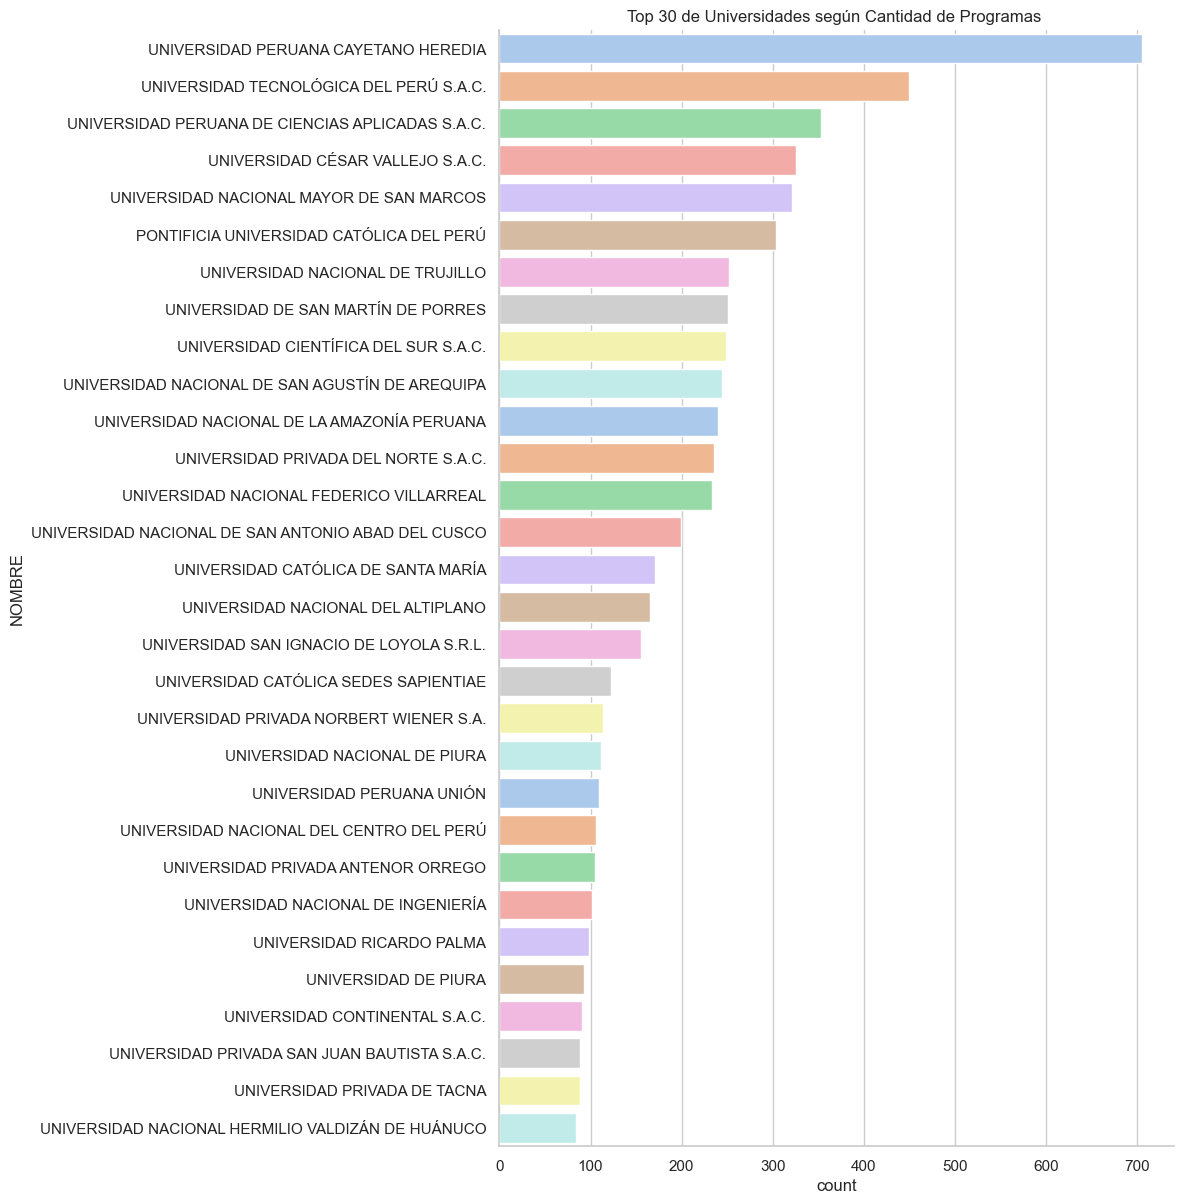

In [322]:
sns.set_theme(style="whitegrid")
sns.catplot(x="count",y="NOMBRE",data=list,kind="bar",hue="NOMBRE", height=12,palette="pastel")
plt.title("Top 30 de Universidades según Cantidad de Programas ")

<div class="section">
            <h4> <strong>Universidades Destacadas</strong></h4>
            <p>Las universidades más destacadas del Perú muestran un panorama diverso y robusto en términos de oferta educativa y reconocimiento institucional. Entre ellas, la Universidad Peruana Cayetano Heredia lidera con 705 programas, consolidándose como referente en ciencias de la salud y biomedicina. Le sigue la Universidad Tecnológica del Perú S.A.C., con 449 programas, enfocada en ingeniería y tecnología, reflejando su compromiso con la formación técnica especializada. Por otro lado, la Pontificia Universidad Católica del Perú se distingue con 303 programas, sobresaliendo en humanidades y ciencias sociales, y consolidándose como una institución de prestigio en la región.</p>
</div>

### Programas según Tipo de Gestión

In [323]:
tipo=df['TIPO_GESTION'].value_counts().head(30).reset_index()
tipo

,TIPO_GESTION,count
0,PRIVADO,4882
1,PÚBLICO,3228


Text(0.5, 1.0, 'Programas segun Tipo de Gestión ')

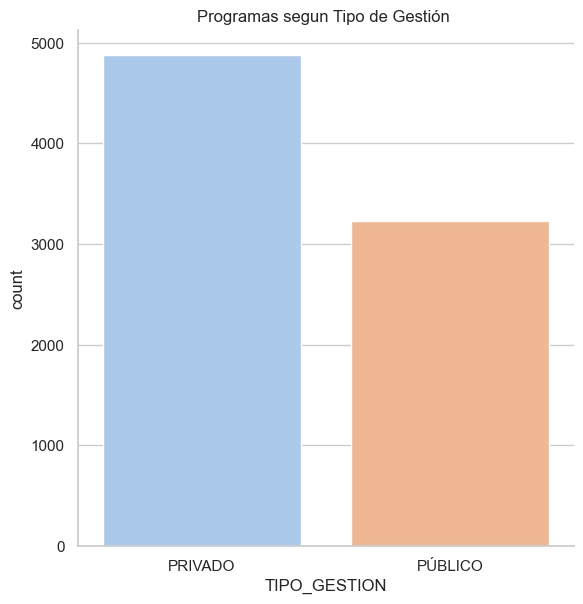

In [324]:
sns.set_theme(style="whitegrid")
sns.catplot(y="count",x="TIPO_GESTION",data=tipo,kind="bar",hue="TIPO_GESTION", height=6, palette="pastel")
plt.title("Programas segun Tipo de Gestión ")

 <strong><h4>Análisis de Programas Universitarios por Tipo de Gestión</h4></strong>
  <p>Según los datos recopilados, los programas universitarios se distribuyen de la siguiente manera:</p>
  <ul>
    <li>Privado: 4882 programas</li>
    <li>Público: 3228 programas</li>
  </ul>
<p>Este análisis revela una clara predominancia de programas gestionados por instituciones privadas en comparación con las públicas. Esta disparidad sugiere una mayor diversidad educativa y especialización por parte del sector privado, potencialmente influenciada por recursos financieros adicionales.</p>
  
  <p>Además, la existencia de más programas privados plantea interrogantes sobre el acceso equitativo a la educación superior y el papel crucial de las instituciones públicas en proporcionar educación accesible y de calidad a amplios sectores de la sociedad.</p>
  
  <p>Este análisis no solo ofrece una visión de la distribución actual de programas universitarios, sino que también invita a reflexionar sobre políticas educativas que promuevan tanto la excelencia académica como la equidad en el acceso a oportunidades educativas.</p>
  

In [325]:
fil=df['FECHA_INICIO_LICENCIAMIENTO'].value_counts().head(30).reset_index()
fil

,FECHA_INICIO_LICENCIAMIENTO,count
0,2016-07-26,767
1,2019-06-12,453
2,2017-10-05,353
3,2019-06-11,326
4,2018-04-10,321
5,2016-07-05,303
6,2018-09-21,252
7,2017-08-10,251
8,2018-05-08,249
9,2018-08-27,244


In [326]:
ffl=df['FECHA_FIN_LICENCIAMIENTO'].value_counts().head(30).reset_index()
ffl

,FECHA_FIN_LICENCIAMIENTO,count
0,2026-07-26,705
1,2025-06-12,453
2,2023-10-05,353
3,2025-06-11,326
4,2028-04-10,321
5,2026-07-05,303
6,2026-09-21,252
7,2023-08-10,251
8,2024-05-08,249
9,2028-08-27,244


### Programas Universitarios por Período de Licenciamiento

In [327]:
pl=df['PERIODO_LICENCIAMIENTO'].value_counts().reset_index()
pl

,PERIODO_LICENCIAMIENTO,count
0,6,5541
1,10,1675
2,8,894


Text(0.5, 1.0, 'Programas Universitarios por Período de Licenciamiento')

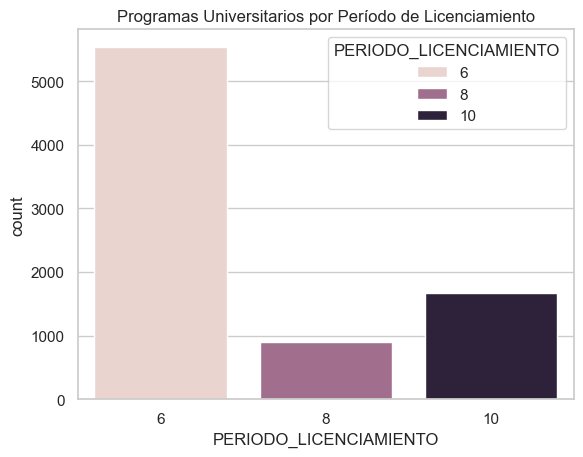

In [328]:
sns.barplot(data=pl,x="PERIODO_LICENCIAMIENTO",y="count",hue="PERIODO_LICENCIAMIENTO")
plt.title("Programas Universitarios por Período de Licenciamiento")

  <strong><h4>Análisis de Programas Universitarios por Período de Licenciamiento</h4> </strong>
  

  <p>Los programas están licenciados según los siguientes períodos:</p>
  
  <ul>
    <li>6 años: 5541 programas</li>
    <li>10 años: 1675 programas</li>
    <li>8 años: 894 programas</li>
  </ul>
  
  <p>Este análisis revela que la mayoría de los programas universitarios tienen un período de licenciamiento de 6 años, seguido por los de 10 años y 8 años. Esta información es crucial para entender la duración y la periodicidad con la que se revisan y renuevan los programas académicos.</p>
 

### Programas Universitarios por Código de Filial

In [329]:
cf=df['CODIGO_FILIAL'].value_counts().reset_index()
cf

,CODIGO_FILIAL,count
0,S,6738
1,F02,300
2,F01,300
3,SL01,226
4,F05,124
5,F03,104
6,S01,98
7,F07,68
8,F06,65
9,F04,62


Text(0.5, 1.0, 'Programas Universitarios por Código de Filial')

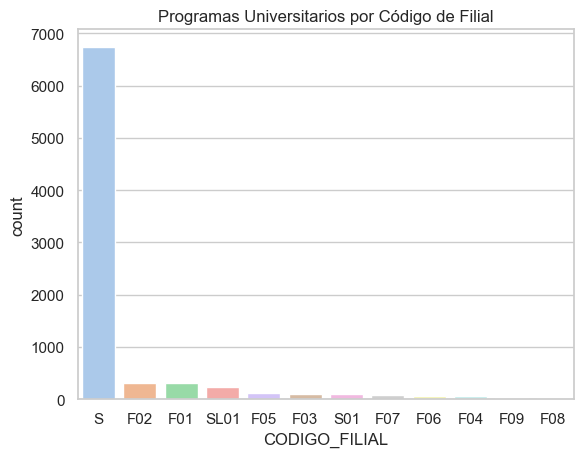

In [330]:
sns.barplot(data=cf,x="CODIGO_FILIAL",y="count",hue="CODIGO_FILIAL",palette="pastel")
plt.title("Programas Universitarios por Código de Filial")

 <strong><h4>Análisis de Programas Universitarios por Código de Filial</h4> </strong>
  <p>Los programas universitarios están distribuidos según el código de filial, con los siguientes conteos:</p>
  <ul>
    <li>S: 6738 programas</li>
    <li>F02: 300 programas</li>
    <li>F01: 300 programas</li>
    <li>SL01: 226 programas</li>
    <li>F05: 124 programas</li>
    <li>F03: 104 programas</li>
    <li>S01: 98 programas</li>
    <li>F07: 68 programas</li>
    <li>F06: 65 programas</li>
    <li>F04: 62 programas</li>
    <li>F09: 14 programas</li>
    <li>F08: 11 programas</li>
  </ul>
  
  <p>Este análisis muestra una clara concentración de programas universitarios en las filiales con código "S", con una notable cantidad en "F02" y "F01". Las filiales con códigos menos frecuentes, como "F09" y "F08", tienen una presencia más limitada.</p>
  
  <p>La distribución de programas según el código de filial puede reflejar diferencias en la especialización académica, infraestructura y ubicación geográfica de cada filial. Estos factores son relevantes para entender la diversidad y la accesibilidad de los programas universitarios ofrecidos por cada filial.</p>
  

### Programas Universitarios por Departamento

In [331]:
dfi=df['DEPARTAMENTO_FILIAL'].value_counts().reset_index()
dfi

,DEPARTAMENTO_FILIAL,count
0,LIMA,4301
1,LA LIBERTAD,567
2,AREQUIPA,546
3,LORETO,245
4,JUNÍN,226
5,PIURA,225
6,LAMBAYEQUE,214
7,CUSCO,206
8,PUNO,196
9,TACNA,169


Text(0.5, 1.0, 'Departamentos con mayor número de programas/filiales')

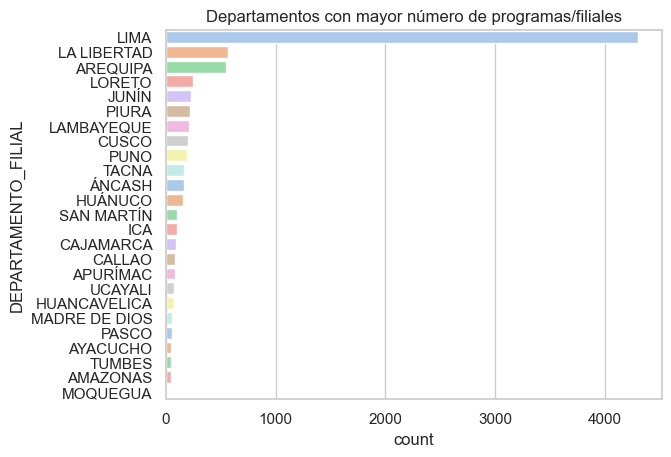

In [332]:
sns.barplot(data=dfi,y="DEPARTAMENTO_FILIAL",x="count",hue="DEPARTAMENTO_FILIAL",palette="pastel")
plt.title("Departamentos con mayor número de programas/filiales")

 <strong><h4>Análisis de Programas Universitarios por Departamento de Filial</h4> </strong>
  
  <p>Los programas universitarios están distribuidos según el departamento de la filial, con los siguientes conteos:</p>
  
  <ul>
    <li>Lima: 4301 programas</li>
    <li>La Libertad: 567 programas</li>
    <li>Arequipa: 546 programas</li>
    <li>Loreto: 245 programas</li>
    <li>Junín: 226 programas</li>
    <li>Piura: 225 programas</li>
    <li>Lambayeque: 214 programas</li>
    <li>Cusco: 206 programas</li>
    <li>Puno: 196 programas</li>
    <li>Tacna: 169 programas</li>
    <li>Áncash: 164 programas</li>
    <li>Huánuco: 160 programas</li>
    <li>San Martín: 107 programas</li>
    <li>Ica: 103 programas</li>
    <li>Cajamarca: 95 programas</li>
    <li>Callao: 89 programas</li>
    <li>Apurímac: 85 programas</li>
    <li>Ucayali: 72 programas</li>
    <li>Huancavelica: 71 programas</li>
    <li>Madre de Dios: 56 programas</li>
    <li>Pasco: 55 programas</li>
    <li>Ayacucho: 49 programas</li>
    <li>Tumbes: 48 programas</li>
    <li>Amazonas: 45 programas</li>
    <li>Moquegua: 16 programas</li>
  </ul>
  
  <p>Este análisis muestra la distribución geográfica de los programas universitarios, con una concentración significativa en Lima, seguido por La Libertad y Arequipa. La presencia de programas en varios departamentos refleja la diversidad regional de las oportunidades educativas ofrecidas por las filiales universitarias.</p>
  
  <p>La variabilidad en los conteos por departamento puede indicar diferencias en la oferta académica, infraestructura educativa y accesibilidad para los estudiantes en diferentes regiones del país.</p>
  

### Programas Universitarios por Distrito

In [333]:
dl=df['DISTRITO_LOCAL'].value_counts().reset_index().head(30)
dl

,DISTRITO_LOCAL,count
0,LIMA,747
1,AREQUIPA,521
2,LA MOLINA,438
3,TRUJILLO,430
4,MIRAFLORES,384
5,SAN MIGUEL,382
6,SANTIAGO DE SURCO,314
7,LOS OLIVOS,248
8,SAN ISIDRO,244
9,SAN MARTÍN DE PORRES,192


Text(0.5, 1.0, 'Top 30 Distritos con mayor número de programas/filiales')

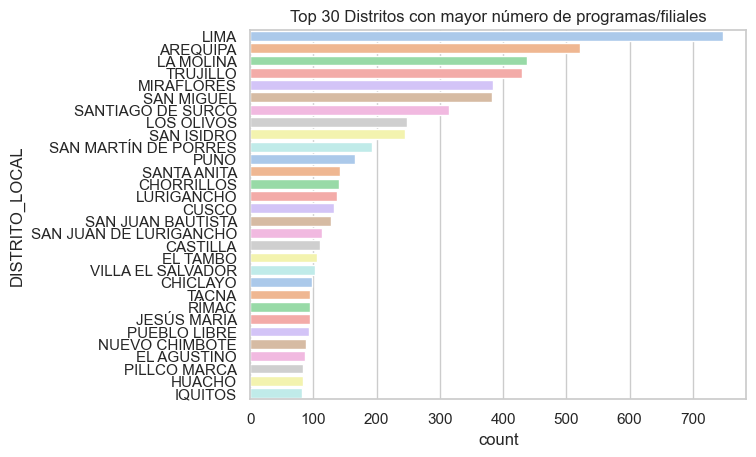

In [334]:
sns.barplot(data=dl,y="DISTRITO_LOCAL",x="count",hue="DISTRITO_LOCAL",palette="pastel")
plt.title("Top 30 Distritos con mayor número de programas/filiales")

<strong><h4>Análisis de Programas Universitarios por Distrito Local</h4></strong>
  <p>Los programas universitarios están distribuidos según el distrito local, con los siguientes conteos:</p>
  
  <ul>
    <li>Lima: 747 programas</li>
    <li>Arequipa: 521 programas</li>
    <li>La Molina: 438 programas</li>
    <li>Trujillo: 430 programas</li>
    <li>Miraflores: 384 programas</li>
    <li>San Miguel: 382 programas</li>
    <li>Santiago de Surco: 314 programas</li>
    <li>Los Olivos: 248 programas</li>
    <li>San Isidro: 244 programas</li>
    <li>San Martín de Porres: 192 programas</li>
    <li>Puno: 165 programas</li>
    <li>Santa Anita: 142 programas</li>
    <li>Chorrillos: 141 programas</li>
    <li>Lurigancho: 138 programas</li>
    <li>Cusco: 132 programas</li>
    <li>San Juan Bautista: 128 programas</li>
    <li>San Juan de Lurigancho: 114 programas</li>
    <li>Castilla: 111 programas</li>
    <li>El Tambo: 106 programas</li>
    <li>Villa El Salvador: 102 programas</li>
    <li>Chiclayo: 97 programas</li>
    <li>Tacna: 95 programas</li>
    <li>Rímac: 94 programas</li>
    <li>Jesús María: 94 programas</li>
    <li>Pueblo Libre: 93 programas</li>
    <li>Nuevo Chimbote: 89 programas</li>
    <li>El Agustino: 86 programas</li>
    <li>Pillco Marca: 84 programas</li>
    <li>Huacho: 83 programas</li>
    <li>Iquitos: 82 programas</li>
  </ul>
  
  <p>Este análisis muestra la distribución de programas universitarios según el distrito local, destacando la concentración en distritos como Lima, Arequipa, y La Molina. Estos datos subrayan la importancia de la ubicación geográfica en la accesibilidad y oferta educativa de las instituciones universitarias.</p>
  
  <p>La variabilidad en los conteos por distrito local refleja diferencias significativas en términos de infraestructura educativa, demanda estudiantil y especialización académica, factores que son cruciales para entender la diversidad educativa en distintas áreas urbanas y rurales del país.</p>
  

### Programas Universitarios por Denominación del Programa

In [335]:
dp=df['DENOMINACION_PROGRAMA'].value_counts().head(30).reset_index()
dp

,DENOMINACION_PROGRAMA,count
0,INGENIERÍA CIVIL,134
1,PSICOLOGÍA,118
2,DERECHO,115
3,CONTABILIDAD,111
4,ENFERMERÍA,95
5,INGENIERÍA INDUSTRIAL,91
6,ADMINISTRACIÓN,85
7,INGENIERÍA AMBIENTAL,76
8,ARQUITECTURA,60
9,ADMINISTRACIÓN DE EMPRESAS,60


Text(0.5, 1.0, 'Top 30 programas con mayor número de filiales')

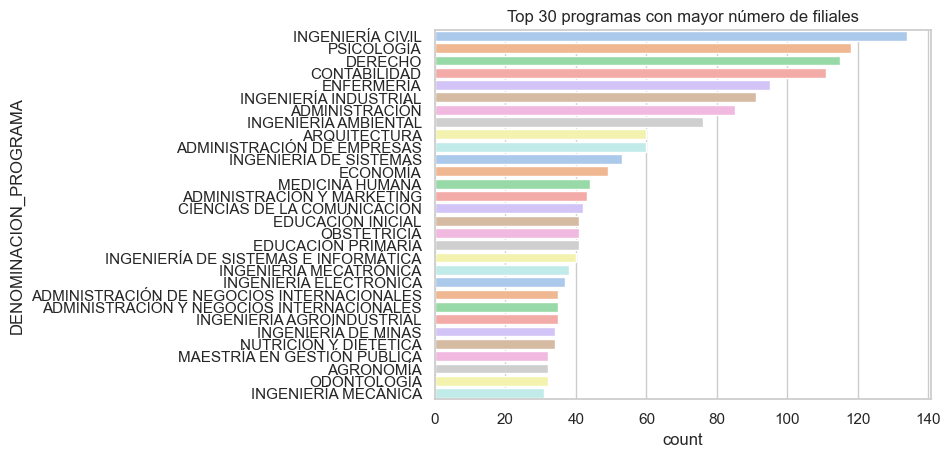

In [336]:
sns.barplot(data=dp,y="DENOMINACION_PROGRAMA",x="count",hue="DENOMINACION_PROGRAMA",palette="pastel")
plt.title("Top 30 programas con mayor número de filiales")

<h4><strong>Análisis de Programas Universitarios por Denominación del Programa</strong></h4>
  <p>Los programas universitarios están distribuidos según la denominación del programa, con los siguientes conteos:</p>
  
  <ul>
    <li>Ingeniería Civil: 134 programas</li>
    <li>Psicología: 118 programas</li>
    <li>Derecho: 115 programas</li>
    <li>Contabilidad: 111 programas</li>
    <li>Enfermería: 95 programas</li>
    <li>Ingeniería Industrial: 91 programas</li>
    <li>Administración: 85 programas</li>
    <li>Ingeniería Ambiental: 76 programas</li>
    <li>Arquitectura: 60 programas</li>
    <li>Administración de Empresas: 60 programas</li>
    <li>Ingeniería de Sistemas: 53 programas</li>
    <li>Economía: 49 programas</li>
    <li>Medicina Humana: 44 programas</li>
    <li>Administración y Marketing: 43 programas</li>
    <li>Ciencias de la Comunicación: 42 programas</li>
    <li>Educación Inicial: 41 programas</li>
    <li>Obstetricia: 41 programas</li>
    <li>Educación Primaria: 41 programas</li>
    <li>Ingeniería de Sistemas e Informática: 40 programas</li>
    <li>Ingeniería Mecatrónica: 38 programas</li>
    <li>Ingeniería Electrónica: 37 programas</li>
    <li>Administración de Negocios Internacionales: 35 programas</li>
    <li>Administración y Negocios Internacionales: 35 programas</li>
    <li>Ingeniería Agroindustrial: 35 programas</li>
    <li>Ingeniería de Minas: 34 programas</li>
    <li>Nutrición y Dietética: 34 programas</li>
    <li>Maestría en Gestión Pública: 32 programas</li>
    <li>Agronomía: 32 programas</li>
    <li>Odontología: 32 programas</li>
    <li>Ingeniería Mecánica: 31 programas</li>
  </ul>
  
  <p>Este análisis muestra la distribución de programas universitarios según la denominación del programa, destacando las áreas más populares como Ingeniería Civil, Psicología, Derecho y Contabilidad. Estos datos reflejan la diversidad académica y la oferta educativa en diferentes disciplinas dentro de las instituciones universitarias.</p>
  
  <p>La variabilidad en los conteos por denominación de programa puede indicar la demanda estudiantil, las tendencias en educación superior y las necesidades del mercado laboral en términos de profesionales capacitados en áreas específicas.</p>
  

### Programas Universitarios por Tipo de Nivel Académico

In [337]:
tna=df['TIPO_NIVEL_ACADEMICO'].value_counts().reset_index().head(30)
tna

,TIPO_NIVEL_ACADEMICO,count
0,POSGRADO,4520
1,PREGRADO,3590


Text(0.5, 1.0, 'Programas Universitarios por Tipo de Nivel Académico')

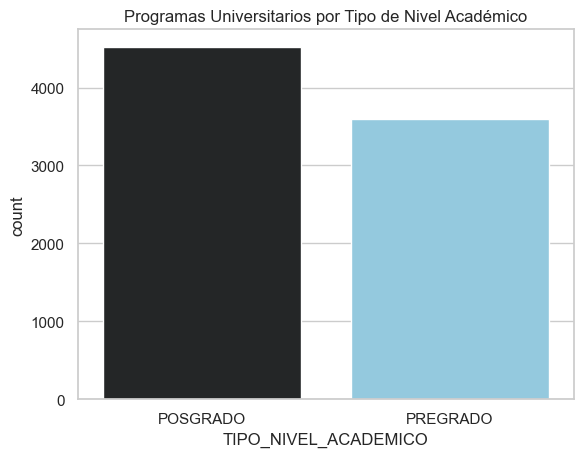

In [338]:
sns.barplot(data=tna,x="TIPO_NIVEL_ACADEMICO",y="count",hue="TIPO_NIVEL_ACADEMICO",palette='dark:skyblue')
plt.title("Programas Universitarios por Tipo de Nivel Académico")

 <h4><strong>Análisis de Programas Universitarios por Tipo de Nivel Académico</strong></h4>
  <p>Los programas universitarios están distribuidos según el tipo de nivel académico, con los siguientes conteos:</p>
  <ul>
    <li>Posgrado: 4520 programas</li>
    <li>Pregrado: 3590 programas</li>
  </ul>
  <p>Este análisis muestra la distribución de programas universitarios según el tipo de nivel académico, destacando una mayor cantidad de programas en el nivel de posgrado en comparación con el nivel de pregrado.</p>
  
  <p>La diferencia en los conteos puede reflejar una variedad de factores, como la especialización académica, las demandas profesionales y las políticas educativas de las instituciones universitarias.</p>
  

### Programas Universitarios por Nivel Académico

In [339]:
na=df['NIVEL_ACADEMICO'].value_counts().reset_index().head(30)
na

,NIVEL_ACADEMICO,count
0,CARRERA PROFESIONAL,3590
1,MAESTRÍA,2255
2,SEGUNDA ESPECIALIDAD,1861
3,DOCTORADO,404


Text(0.5, 1.0, 'Programas Universitarios por Nivel Académico')

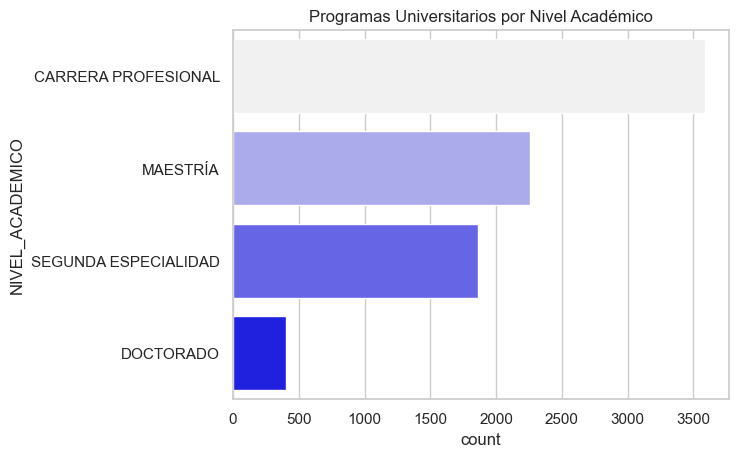

In [340]:
sns.barplot(data=na,y="NIVEL_ACADEMICO",x="count",hue="NIVEL_ACADEMICO",palette='light:blue')
plt.title("Programas Universitarios por Nivel Académico")

<h4><strong>Análisis de Programas Universitarios por Nivel Académico</strong></h4>
  
  <p>Los programas universitarios están distribuidos según el nivel académico, con los siguientes conteos:</p>
  
  <ul>
    <li>Carrera Profesional: 3590 programas</li>
    <li>Maestría: 2255 programas</li>
    <li>Segunda Especialidad: 1861 programas</li>
    <li>Doctorado: 404 programas</li>
  </ul>
  
  <p>Este análisis muestra la distribución de programas universitarios según el nivel académico, destacando una mayor cantidad de programas en Carrera Profesional, seguida de Maestría, Segunda Especialidad y Doctorado.</p>
  
  <p>Estos datos reflejan la diversidad académica y la oferta educativa en diferentes niveles de especialización y formación profesional, ajustándose a las necesidades y expectativas de los estudiantes y el mercado laboral.</p>
  

### Programas Universitarios por Clase de Programa N2

In [341]:
ncp=df['NOMBRE_CLASE_PROGRAMA_N2'].value_counts().reset_index().head(30)
ncp

,NOMBRE_CLASE_PROGRAMA_N2,count
0,SALUD,1466
1,ADMINISTRACIÓN Y COMERCIO,1230
2,NINGUNO,1163
3,CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,482
4,ARQUITECTURA Y CONSTRUCCIÓN,330
5,DERECHO,311
6,INFORMÁTICA,286
7,INDUSTRIA Y PRODUCCIÓN,284
8,OTROS PROGRAMAS EN EDUCACIÓN,266
9,SERVICIOS DE HIGIENE Y SALUD OCUPACIONAL,261


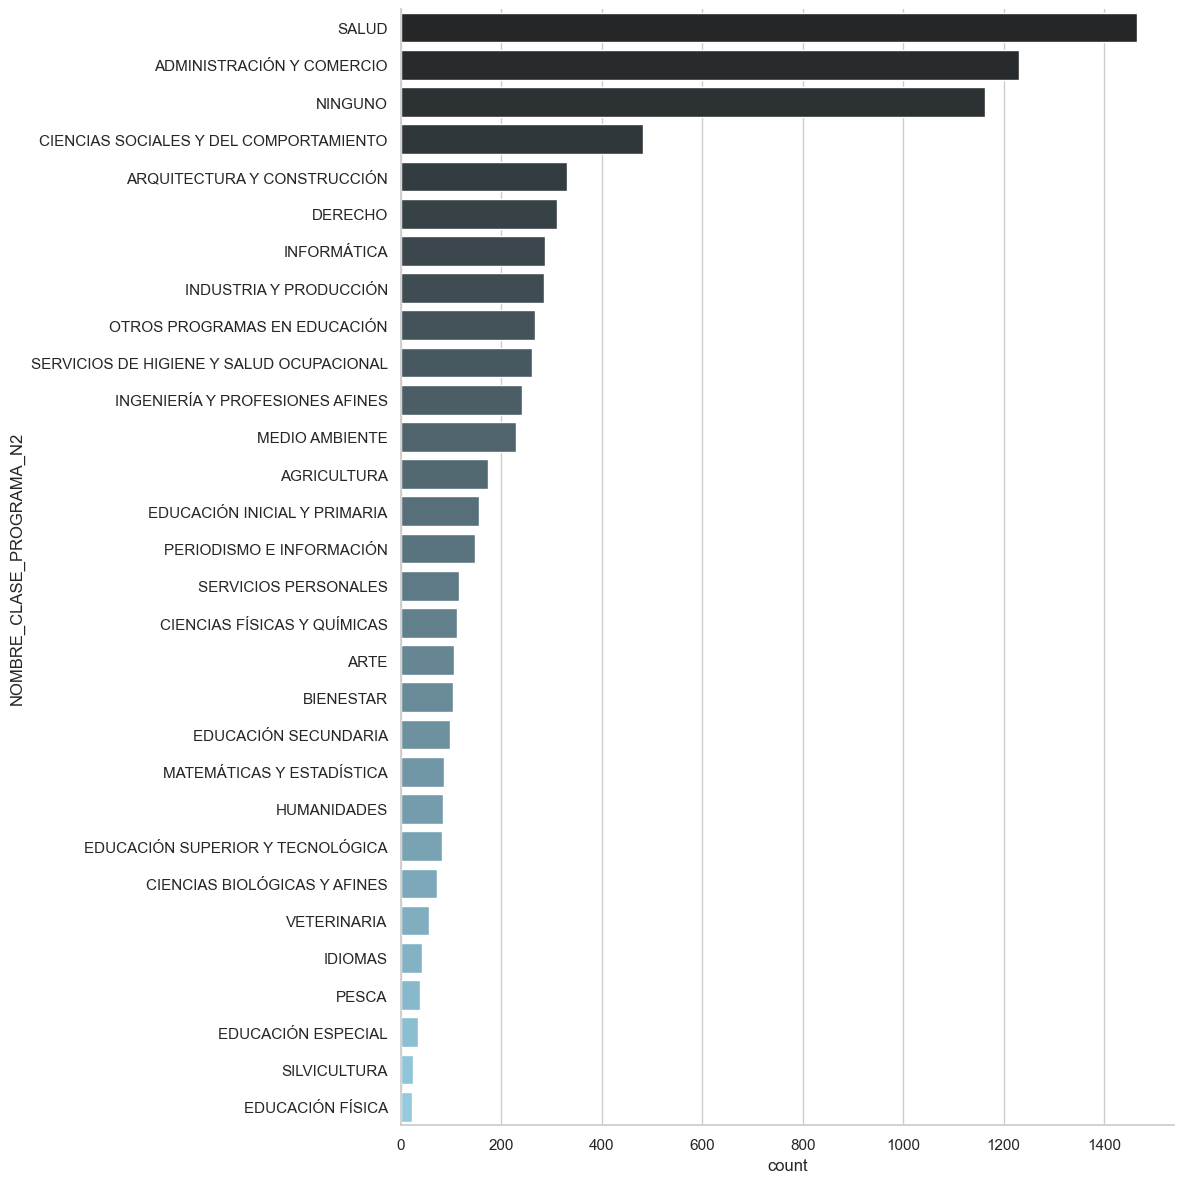

In [342]:
sns.set_theme(style="whitegrid")
sns.catplot(x="count",y="NOMBRE_CLASE_PROGRAMA_N2",data=ncp, kind="bar",hue="NOMBRE_CLASE_PROGRAMA_N2", height=12,palette="dark:skyblue")


 <h4><strong>Análisis de Programas Universitarios por Clase de Programa N2</strong></h4>
  <p>Los programas universitarios están distribuidos según la clase de programa N2, con los siguientes conteos:</p>
  
  <p>Este análisis muestra la distribución de programas universitarios según la clase de programa N2, destacando la variedad de disciplinas y áreas de estudio ofrecidas por las instituciones educativas.</p>
  
  <p>Los conteos reflejan la diversidad académica y la especialización en diferentes campos del conocimiento, adaptándose a las necesidades educativas y profesionales de los estudiantes y la sociedad en general.</p>
  

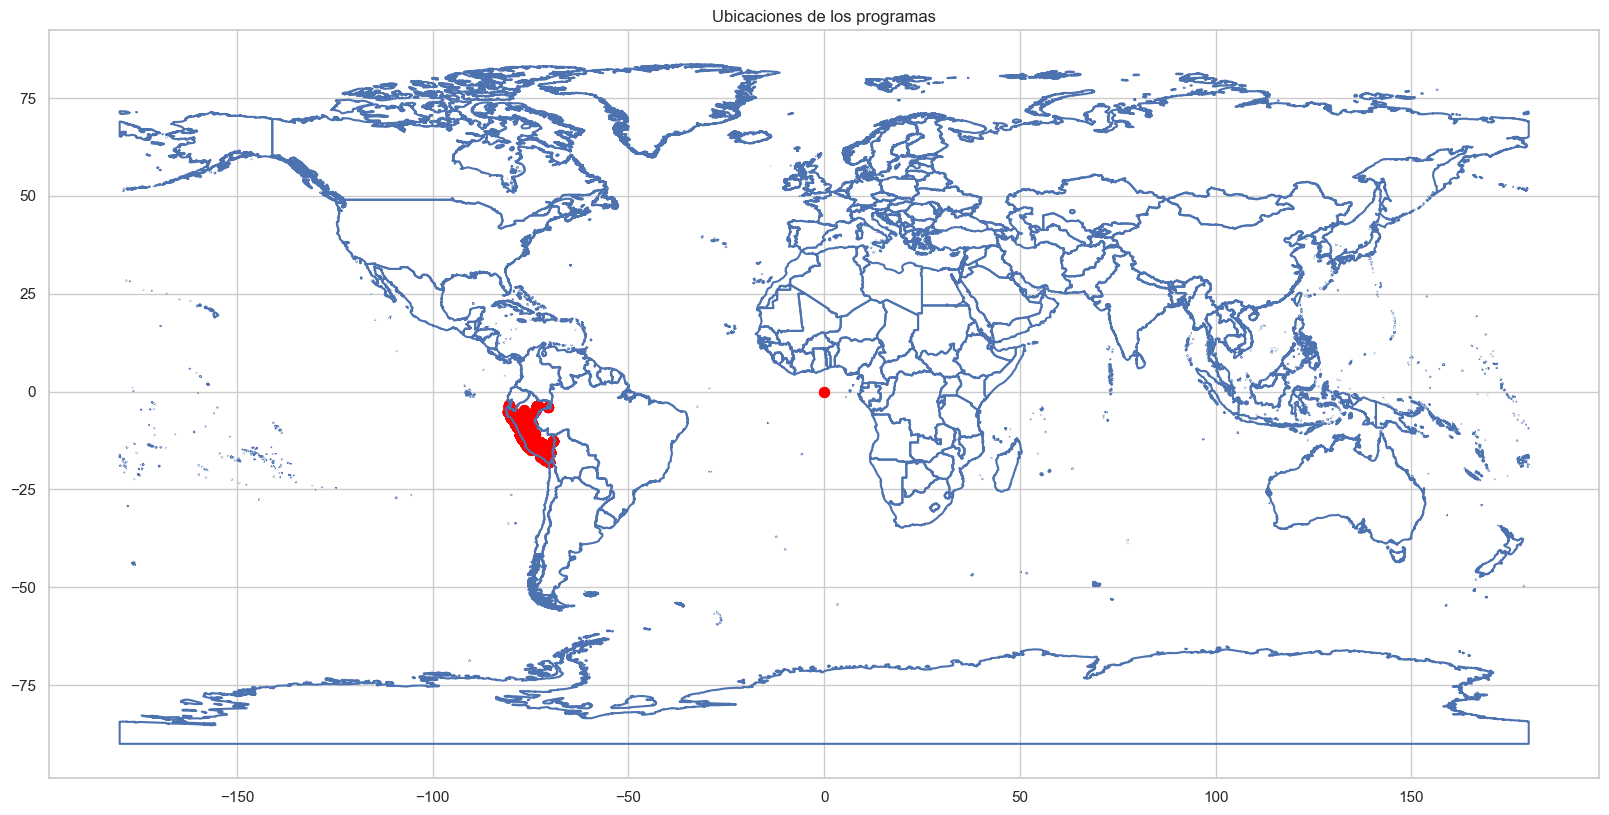

In [343]:
geometry = [Point(xy) for xy in zip(df['LONGITUD_UBICACION'], df['LATITUD_UBICACION'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Cargar el archivo desde ruta
world = gpd.read_file("ne_10m_admin_0_countries.shp")

# Plot en el mapa
fig, ax = plt.subplots(figsize=(20, 20))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=50)
plt.title('Ubicaciones de los programas')
plt.show()


C:\Users\elias\AppData\Local\Temp\ipykernel_9144\816391628.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


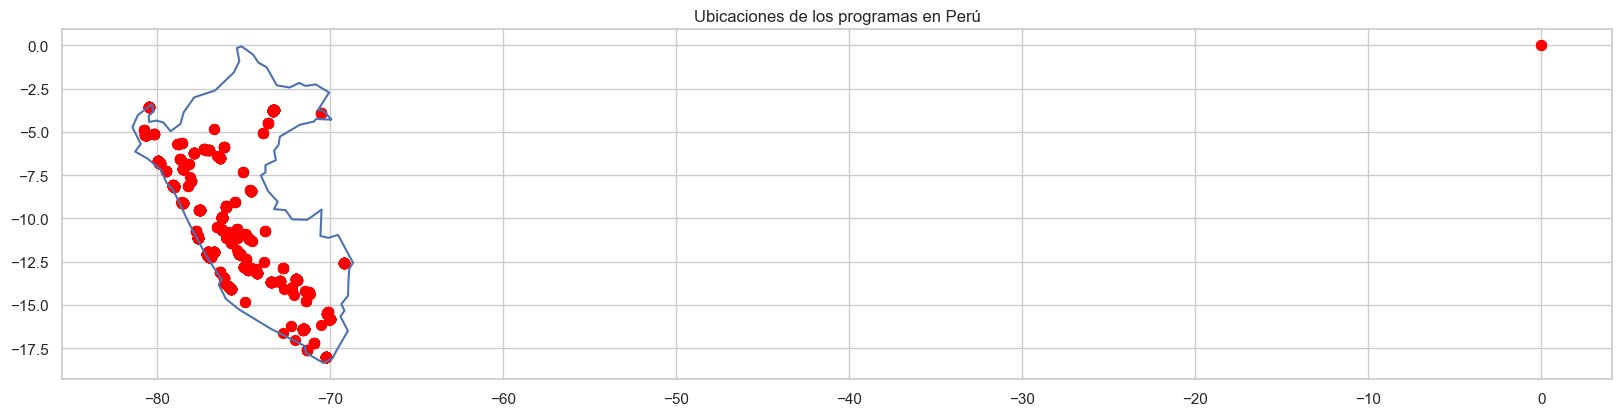

In [344]:
# GeoDataFrame
geometry = [Point(xy) for xy in zip(df['LONGITUD_UBICACION'], df['LATITUD_UBICACION'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar el shapefile
peru = world[world.name == "Peru"]

# Plotear os programas
fig, ax = plt.subplots(figsize=(20, 20))
peru.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=50)
plt.title('Ubicaciones de los programas en Perú')
plt.show()

In [345]:
#crear un mapa en formato HTML

# mapa centrado
m = folium.Map(location=[-12.0464, -77.0428], zoom_start=5)

# Añadir los puntos 
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['LATITUD_UBICACION'], row['LONGITUD_UBICACION']],
        popup=row['NOMBRE']
    ).add_to(m)

# mapa en un archivo HTML
m.save("mapa_programas.html")


<img src="mapa_programas.png" alt="" width="800px">

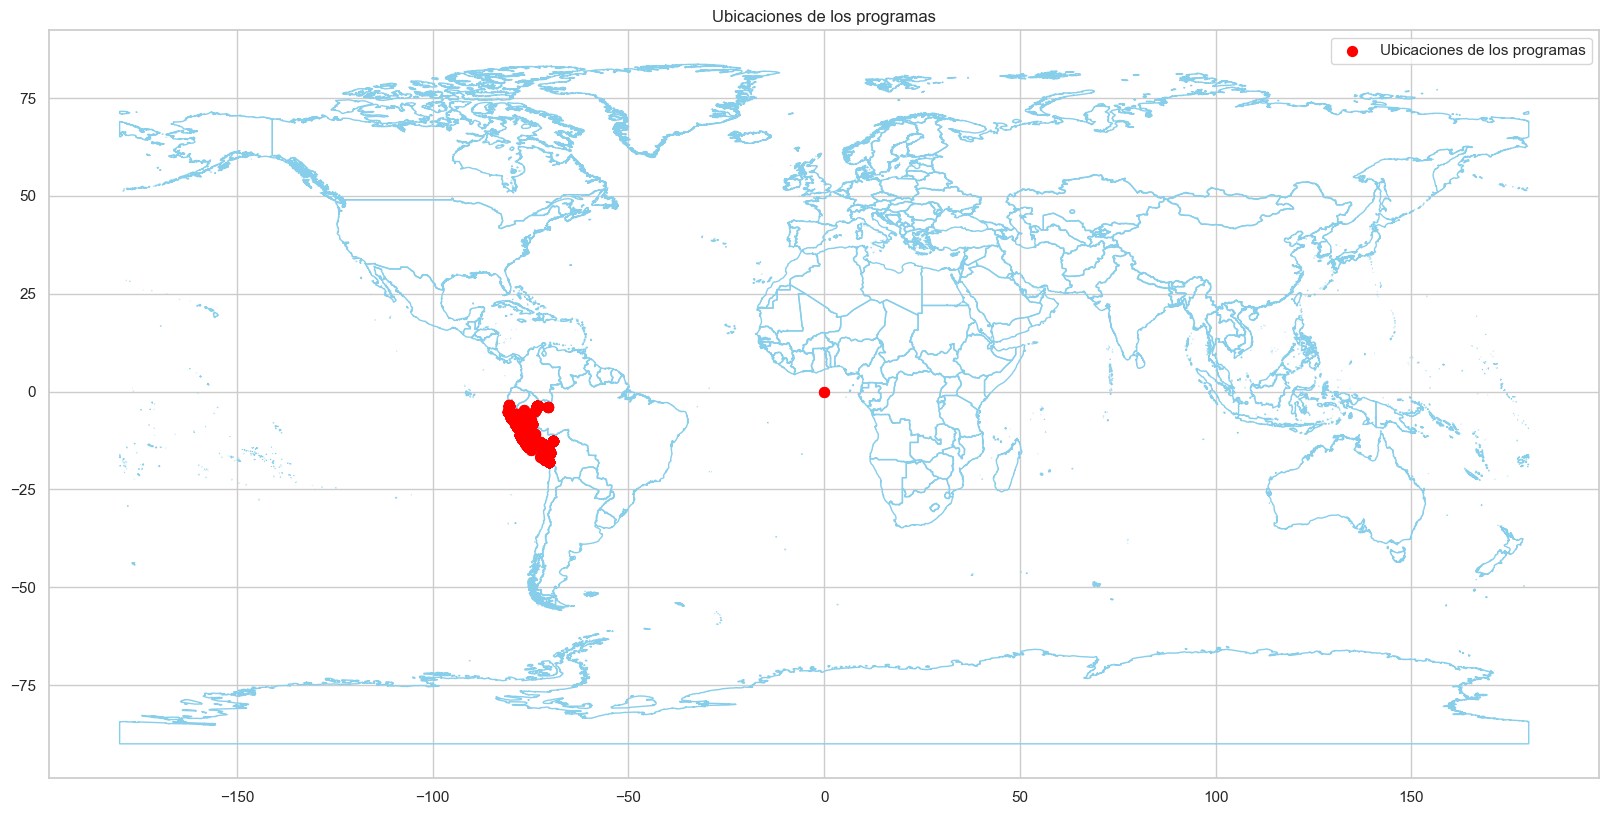

In [346]:

geometry = [Point(xy) for xy in zip(df['LONGITUD_UBICACION'], df['LATITUD_UBICACION'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file("ne_10m_admin_0_countries.shp")

fig, ax = plt.subplots(figsize=(20, 20))  
world.plot(ax=ax, edgecolor='skyblue', facecolor='none')  

gdf.plot(ax=ax, color='red', markersize=50, marker='o', label='Ubicaciones de los programas')

plt.title('Ubicaciones de los programas')
plt.legend()
plt.show()


In [347]:
#crear un mapa de calor en formato HTML

# Crear un mapa
m = folium.Map(location=[-12.0464, -77.0428], zoom_start=5)

# mapa de calor
heat_data = [[row['LATITUD_UBICACION'], row['LONGITUD_UBICACION']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en HTML
m.save("heatmap_programas.html")


<img src="heatmap_programas2.png" alt="" width="800px">

 <h1>Análisis Final</h1>
    <div class="section">
        <h4>Tipo de Gestión y Licenciamiento</h4>
        <p>Los programas universitarios en el Perú se dividen principalmente en privados y públicos. Destaca una mayor cantidad de programas licenciados por períodos de seis y diez años, indicando un compromiso con la calidad educativa y la regulación académica.</p>
    </div>
    <div class="section">
        <h4>Filial y Departamento</h4>
        <p>El análisis revela que Lima lidera como epicentro educativo, seguido por La Libertad, Arequipa y Loreto. Cada región ofrece programas adaptados a las necesidades locales, reflejando la diversidad geográfica y cultural del país.</p>
    </div>
    <div class="section">
        <h4>Ubicación y Clase de Programa</h4>
        <p>Las ubicaciones de los programas se concentran en distritos urbanos como Lima, Arequipa y Trujillo. Las clases de programas varían desde Salud y Administración hasta Ciencias Sociales y del Comportamiento, abarcando una amplia gama de intereses académicos y profesionales.</p>
    </div>
    <div class="section">
        <h4>Nivel Académico y Especialización</h4>
        <p>Se observa un aumento en los programas de posgrado, indicando una creciente demanda por especialización y educación continua. Carreras profesionales y maestrías son predominantes, seguidas por segundas especialidades y programas de doctorado que contribuyen a la formación avanzada de profesionales.</p>
    </div>
    <div class="section">
        <h4>Perspectivas Futuras</h4>
        <p>La adaptabilidad y relevancia de los programas educativos serán cruciales a medida que el Perú avanza hacia un futuro de innovación y desarrollo. Las universidades desempeñan un papel fundamental en la preparación de la próxima generación de profesionales para enfrentar los desafíos del mercado laboral y las necesidades sociales en evolución.</p>
    </div>
    <p style="text-align: center; font-style: italic; color: #888;">Este análisis refleja la diversidad y dinamismo del paisaje educativo peruano, destacando la búsqueda continua de la excelencia académica y la formación integral de los estudiantes fomentado por las Instituciones públicas y privadas del pais.</p>



  <p><em>Por [EQV]</em></p>
